## House_Price_Prediction

### Importing Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load Data 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
len(df)

1460

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df[df['PoolArea'] != 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Data Exploration and Preprocessing 

#####  well its a large data set so lets  divide into numerical and categorical data columns first

In [7]:
df_num = df.select_dtypes(include= np.number)
df_cat = df.select_dtypes(exclude = np.number)

In [8]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


##### Lets check the skewness of the target data

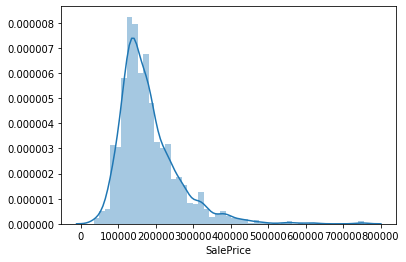

In [10]:
sns.distplot(df['SalePrice'])

In [11]:
print(df['SalePrice'].skew())

1.8828757597682129


##### Most Correlated variables

Text(0.5, 1, 'Top 10 correlated variable with SalePrice')

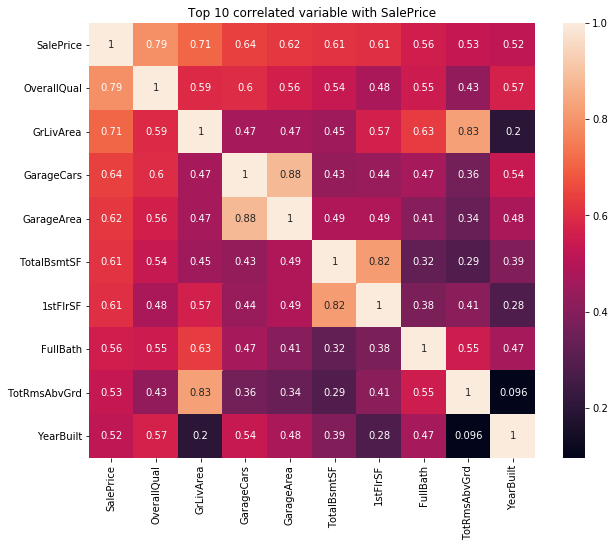

In [12]:
my_col_list = list(df.corr().nlargest(10,'SalePrice').index)
plt.figure(figsize = (10,8))
ax = sns.heatmap(df[my_col_list].corr(),annot = True)
b,t = ax.get_ylim()
ax.set_ylim(b+0.5,t-0.5)
plt.title('Top 10 correlated variable with SalePrice')

#Garage area in cars size and Garage Area both are relatively same so lets rempove GarageArea column

In [13]:
df_num.drop('GarageArea',axis = 1,inplace = True)

In [14]:
df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Imputation for numerical columns

In [15]:
df_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [16]:
#using 0 for null columns
df_num['LotFrontage'].fillna(0,inplace = True)
#No Garage so using 0
df_num['GarageYrBlt'].fillna(0,inplace = True)
#using 0 for masvr area
df_num['MasVnrArea'].fillna(0,inplace = True)

In [17]:
df_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

#### Categorical columns data imputation and encoding

In [18]:
df_cat.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [19]:
#for Alley paved is mostly preferred than gravel
df_cat['Alley'].fillna(0,inplace = True)
inmap = {0:0,'Grvl':1,'Pave':2}
df_cat['Alley'] = df_cat['Alley'].map(inmap)
df_cat['Alley'].unique()

array([0, 1, 2], dtype=int64)

In [20]:
pending_columns = list(df_cat.columns)
pending_columns.remove('Alley')

In [21]:
#No basement value is zero
my_col = ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_cat[my_col] =df_cat[my_col].fillna(0)

In [22]:
inmap = {0:0,'Po':1,'Fa':2, 'TA':3,'Gd':4,'Ex':5}
df_cat['BsmtQual'] = df_cat['BsmtQual'].map(inmap)
pending_columns.remove('BsmtQual')
df_cat['BsmtQual'].value_counts()

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

In [23]:
inmap = {0:0,'Po':1,'Fa':2, 'TA':3,'Gd':4,'Ex':5}
df_cat['BsmtCond'] = df_cat['BsmtCond'].map(inmap)
pending_columns.remove('BsmtCond')
df_cat['BsmtCond'].value_counts()

3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

In [24]:
inmap = {0:0,'No':1,'Mn':2, 'Av':3,'Gd':4,'Ex':5}
df_cat['BsmtExposure'] = df_cat['BsmtExposure'].map(inmap)
pending_columns.remove('BsmtExposure')
df_cat['BsmtExposure'].value_counts()

1    953
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64

In [25]:
inmap = {0:0,'unf':1,'lwq':2,'rec':3,'blq':4,'alq':5,'glq':6}
df_cat['BsmtFinType1'] = df_cat['BsmtFinType1'].apply(lambda x: x.lower() if type(x) is str else x)
df_cat['BsmtFinType1'] = df_cat['BsmtFinType1'].map(inmap)
pending_columns.remove('BsmtFinType1')
df_cat['BsmtFinType1'].value_counts()

1    430
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64

In [26]:
inmap = {0:0,'unf':1,'lwq':2,'rec':3,'blq':4,'alq':5,'glq':6}
df_cat['BsmtFinType2'] = df_cat['BsmtFinType2'].apply(lambda x: x.lower() if type(x) is str else x)
df_cat['BsmtFinType2'] = df_cat['BsmtFinType2'].map(inmap)
pending_columns.remove('BsmtFinType2')
df_cat['BsmtFinType2'].value_counts()

1    1256
3      54
2      46
0      38
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64

In [27]:
df_cat['FireplaceQu'] = df_cat['FireplaceQu'].fillna(0)
inmap = {0:0,'Po':1,'Fa':2, 'TA':3,'Gd':4,'Ex':5}
df_cat['FireplaceQu'] = df_cat['FireplaceQu'].map(inmap)
pending_columns.remove('FireplaceQu')
df_cat['FireplaceQu'].value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [28]:
df_cat['MasVnrType'] = df_cat['MasVnrType'].fillna(0)
# here none is Cblock type there is a mismatch from data info
inmap = {0:0,'None':1,'BrkFace':2, 'Stone':3,'BrkCmn':4,}
df_cat['MasVnrType'] = df_cat['MasVnrType'].map(inmap)
pending_columns.remove('MasVnrType')
df_cat['MasVnrType'].value_counts()

1    864
2    445
3    128
4     15
0      8
Name: MasVnrType, dtype: int64

In [29]:
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [30]:
my_col = ['GarageType', 'GarageFinish', 'GarageQual','GarageCond']
df_cat[my_col] =df_cat[my_col].fillna(0)

In [31]:
inmap = {0:0,'Attchd':1,'Detchd':2,'BuiltIn':3,'Basment':4,'CarPort':5,'2Types':6}
df_cat['GarageType'] = df_cat['GarageType'].map(inmap)
pending_columns.remove('GarageType')
df_cat['GarageType'].value_counts()

1    870
2    387
3     88
0     81
4     19
5      9
6      6
Name: GarageType, dtype: int64

In [32]:
inmap = {0:0,'Po':1,'Fa':2, 'TA':3,'Gd':4,'Ex':5}
df_cat['GarageCond'] = df_cat['GarageCond'].map(inmap)
pending_columns.remove('GarageCond')
df_cat['GarageCond'].value_counts()

3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64

In [33]:
inmap = {0:0,'Po':1,'Fa':2, 'TA':3,'Gd':4,'Ex':5}
df_cat['GarageQual'] = df_cat['GarageQual'].map(inmap)
pending_columns.remove('GarageQual')
df_cat['GarageQual'].value_counts()

3    1311
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64

In [34]:
inmap = {0:0,'Unf':1,'RFn':2,'Fin':3}
df_cat['GarageFinish'] = df_cat['GarageFinish'].map(inmap)
pending_columns.remove('GarageFinish')
df_cat['GarageFinish'].value_counts()

1    605
2    422
3    352
0     81
Name: GarageFinish, dtype: int64

In [35]:
df_cat['PoolQC'].fillna(0,inplace = True)
inmap = {0:0,'Po':1,'Fa':2, 'TA':3,'Gd':4,'Ex':5}
df_cat['PoolQC'] = df_cat['PoolQC'].map(inmap)
pending_columns.remove('PoolQC')
df_cat['PoolQC'].value_counts()

0    1453
4       3
5       2
2       2
Name: PoolQC, dtype: int64

In [36]:
df_cat['Fence'].fillna(0,inplace = True)
inmap = {0:0,'MnWw':1,'GdWo':2, 'MnPrv':3,'GdPrv':4,}
df_cat['Fence'] = df_cat['Fence'].map(inmap)
pending_columns.remove('Fence')
df_cat['Fence'].value_counts()

0    1179
3     157
4      59
2      54
1      11
Name: Fence, dtype: int64

In [37]:
df_cat['MiscFeature'].fillna(0,inplace = True)
temp1 = list(df_cat['MiscFeature'].unique())
temp2 = [0,1,1,1,1]
inmap = {k:v for k,v in zip(temp1,temp2)}
df_cat['MiscFeature'] = df_cat['MiscFeature'].map(inmap)
pending_columns.remove('MiscFeature')
df_cat['MiscFeature'].value_counts()

0    1406
1      54
Name: MiscFeature, dtype: int64

In [38]:
inmap = {'IR3':0,'IR2':1,'IR1':2,'Reg':3}
df_cat['LotShape']  = df_cat['LotShape'].map(inmap)
pending_columns.remove('LotShape')
df_cat['LotShape'].value_counts()

3    925
2    484
1     41
0     10
Name: LotShape, dtype: int64

In [39]:
inmap = {'ELO':0,'NoSeWa':1,'NoSeWr':2,'AllPub':3}
df_cat['Utilities'] = df_cat['Utilities'].map(inmap)
pending_columns.remove('Utilities')
df_cat['Utilities'].value_counts()

3    1459
1       1
Name: Utilities, dtype: int64

In [40]:
inmap = {0:0,'Po':1,'Fa':2, 'TA':3,'Gd':4,'Ex':5}
df_cat['ExterQual'] = df_cat['ExterQual'].map(inmap)
pending_columns.remove('ExterQual')
df_cat['ExterQual'].value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [41]:
inmap = {0:0,'Po':1,'Fa':2, 'TA':3,'Gd':4,'Ex':5}
df_cat['ExterCond'] = df_cat['ExterCond'].map(inmap)
pending_columns.remove('ExterCond')
df_cat['ExterCond'].value_counts()

3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64

In [42]:
inmap = {0:0,'Po':1,'Fa':2, 'TA':3,'Gd':4,'Ex':5}
df_cat['HeatingQC'] = df_cat['HeatingQC'].map(inmap)
pending_columns.remove('HeatingQC')
df_cat['HeatingQC'].value_counts()

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

In [43]:
inmap = {0:0,'Po':1,'Fa':2, 'TA':3,'Gd':4,'Ex':5}
df_cat['KitchenQual'] = df_cat['KitchenQual'].map(inmap)
pending_columns.remove('KitchenQual')
df_cat['KitchenQual'].value_counts()

3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64

In [44]:
df_cat.isnull().any()

MSZoning         False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
PoolQC           False
Fence            False
MiscFeature      False
SaleType         False
SaleCondition    False
dtype: bool

In [45]:
len(pending_columns)

22

##### LabelEncoding Required

In [46]:
print(pending_columns)

['MSZoning', 'Street', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [48]:
df_cat[pending_columns] = le.fit_transform(pending_columns)

In [49]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
MasVnrType       1460 non-null int64
ExterQual        1460 non-null int64
ExterCond        1460 non-null int64
Foundation       1460 non-null int64
BsmtQual         1460 non-null int64
BsmtCond         1460 non-null int64
BsmtExposure     1460 non-null int64
BsmtF

#### FeatureScaling

In [50]:
df_num.drop('Id',axis =1,inplace = True)
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [51]:
temp_df = pd.concat([df_num,df_cat],axis = 1)
temp_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,2,3,3,16,0,0,0,20,19
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,2,3,3,16,0,0,0,20,19
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,2,3,3,16,0,0,0,20,19
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,2,1,3,3,16,0,0,0,20,19
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,2,3,3,16,0,0,0,20,19


In [52]:
temp_df.dropna(inplace = True)

In [53]:
temp_df.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
                ..
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [54]:
my_col = list(temp_df.columns)
my_col.remove('SalePrice')
# my_col.remove('MSSubClass')

In [55]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [56]:
temp_df[my_col] = rs.fit_transform(temp_df[my_col])
temp_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.2,0.054054,-0.254076,0.5,0.0,0.652174,0.243243,1.193303,0.452790,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.6,0.459459,0.030015,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.135135,0.437624,0.5,0.0,0.608696,0.216216,0.986301,0.143910,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,-0.081081,0.017663,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,0.0,...,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.567568,1.181201,1.0,0.0,0.586957,0.162162,2.130898,0.381186,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### X and y

In [57]:
X = temp_df.drop('SalePrice',axis = 1)
y = temp_df['SalePrice']

In [58]:
X.shape

(1460, 78)

In [59]:
y.shape

(1460,)

### TrainTestSplit

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 101)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 78)
(365, 78)
(1095,)
(365,)


#### LinearRegression Model

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lr.score(X_train,y_train)

0.8684762364277947

#### Prediction and evaluations

In [66]:
y_pred = lr.predict(X_test)

In [67]:
from sklearn.metrics import r2_score

In [68]:
r2_score(y_pred,y_test)

0.64943067556954

##### model is 64% accurate and train data is 86% accurate This is clearly a case of overfitting So lets make model simpler

### Using Simpler model 

In [70]:
pd.set_option('display.max_columns',None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
df.drop('Id',axis = 1,inplace = True)

In [72]:
X = df.drop('SalePrice',1)
y = df['SalePrice']

In [73]:
columns_num = X.select_dtypes(include = ['int64','float64']).columns.tolist()
X[columns_num] = X[columns_num].fillna(X[columns_num].mean())

In [74]:
columns_cat = X.select_dtypes(include=['object']).columns.tolist()
X[columns_cat]= X[columns_cat].fillna(X[columns_cat].mode().iloc[0])

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()
X[columns_cat] = X[columns_cat].apply(lambda col: le.fit_transform(col.astype(str)))

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [78]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_pred = lr_model.predict(X_test)

In [81]:
r2 = r2_score(y_test, y_pred)
print('r2_score:', r2)

r2_score: 0.8387269435085206


In [82]:
lr_model.score(X_train,y_train)

0.8583465019091358